In [1]:
# Python imports 
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from spectral.io import envi
from pyproj import Proj
import os
from glob import glob

In [3]:
# Examine Adjacent Quick Look geoTIFF Scenes using GDAL

for geotiff in glob("data/*.tif"):
    print(f"{os.path.basename(geotiff)}")

ang20231110t081307_006_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT_QL.tif


In [5]:
# open and read tif files for comparison

ql_006 = gdal.Open('data/ang20231110t081307_006_L2A_OE_main_27577724_RFL_ORT_QL.tif')
ql_007 = gdal.Open('data/ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT_QL.tif')

nbands_006 = ql_006.RasterCount
ncols_006 = ql_006.RasterXSize
nrows_006 = ql_006.RasterYSize

nbands_007 = ql_007.RasterCount
ncols_007 = ql_007.RasterXSize
nrows_007 = ql_007.RasterYSize

print(f"Bands_006:\t{nbands_006}")
print(f"Rows_006:\t{nrows_006}")
print(f"Cols_006:\t{ncols_006}")
print("\n")
print(f"Bands_007:\t{nbands_007}")
print(f"Rows_007:\t{nrows_007}")
print(f"Cols_007:\t{ncols_007}")

Bands_006:	3
Rows_006:	663
Cols_006:	650


Bands_007:	3
Rows_007:	672
Cols_007:	646


In [7]:
ql_007.GetProjection()

'PROJCS["WGS 84 / UTM zone 34S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32734"]]'

In [9]:
# Create a Virtual Raster of the 2 Adjacent AVIRIS-NG Scenes
#build vrt - using AVIRIS-NG quicklook images 

# running gdalbuilvrt as a gdal command line using the '!' in front says do this as a command, not as python
# using scences from the Bracnenburn Private Nature Reserve

!gdalbuildvrt brack_mosaic.vrt data/*.tif

# read in vrt, ql ~ quicklook
brack_vrt = gdal.Open('brack_mosaic.vrt')

nbands_vrt = brack_vrt.RasterCount
ncols_vrt = brack_vrt.RasterXSize
nrows_vrt = brack_vrt.RasterYSize

print(f"Bands_vrt:\t{nbands_vrt}")
print(f"Rows_vrt:\t{nrows_vrt}")
print(f"Cols_vrt:\t{ncols_vrt}")

'gdalbuildvrt' is not recognized as an internal or external command,
operable program or batch file.


Bands_vrt:	3
Rows_vrt:	1953
Cols_vrt:	1262


In [11]:
# Examine AVIRIS-NG Quiklook Reflectance Data as a Numerical Array
# Recall that we created the quicklook virtual raster (ql_vrt) from two adjacent scenes
brack_array = brack_vrt.ReadAsArray()

# look at the shape. GDAL reads the array as band,x,y.  
print(brack_array.shape)   

(3, 1953, 1262)


In [13]:
#To plot the array with matplotlib, the data need to be arranged as y, x, band.
# We'll transpose the data
trans_array = brack_array.transpose((1,2,0))
print(trans_array.shape)

(1953, 1262, 3)


In [ ]:
# To demonstrate that data needs transposed, this will give an error because the data needs to be transposed
# This is the error:  TypeError: Invalid shape (3, 1268, 1216) for image data
#plt.imshow(brack_array)

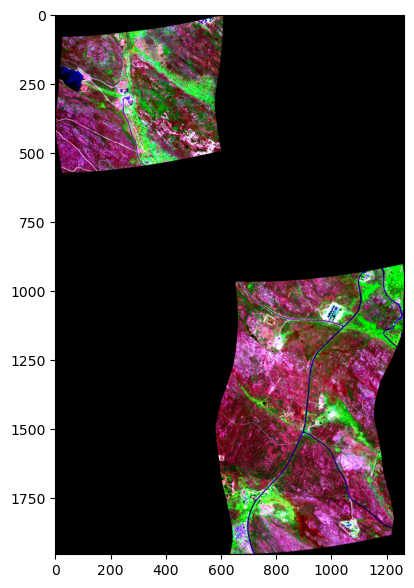

In [15]:
plt.rcParams['figure.figsize'] = [10,7]
plt.imshow(trans_array)

In [ ]:
# AVIRIS-NG L2A Reflectance DataCube - Image Spectroscopy (ENVI format)
# Need to untar/uncompress data files
#!tar -zxvf aang20231110t081307_006_L2A_OE_main_27577724_RFL_ORT.tar.gz
#!tar -zxvf ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT.tar.gz

In [17]:
for files in glob("data/*"):
    print(f"{os.path.basename(files)}")

ang20231110t081307_006_L2A_OE_main_27577724_RFL_ORT
ang20231110t081307_006_L2A_OE_main_27577724_RFL_ORT.hdr
ang20231110t081307_006_L2A_OE_main_27577724_RFL_ORT.tar.gz
ang20231110t081307_006_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT
ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT.hdr
ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT.tar.gz
ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT_QL.tif


In [19]:
# Examine the header file of one of the ENVI scenes
hdr_f = 'data/ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT.hdr'
with open(hdr_f, mode='r') as hdr:
    lines = (hdr.read())
    print(lines)

ENVI
description = {
  L2A Analytyical per-pixel surface retrieval}
samples = 646
lines = 672
bands = 425
header offset = 0
file type = ENVI Standard
data type = 4
interleave = bil
byte order = 0
map info = {UTM, 1, 1, 727446.8657409984, 6240280.191764411, 5.0, 5.0, 34, South, WGS-84, units=Meters, rotation=0.0}
wavelength units = Nanometers
wavelength = { 377.1956495 , 382.20564950000005 , 387.2156495 , 392.2256495 , 397.2256495 , 402.2356495 , 407.24564949999996 , 412.2556495 , 417.2656495 , 422.27564950000004 , 427.2856495 , 432.29564949999997 , 437.29564949999997 , 442.3056495 , 447.3156495 , 452.3256495 , 457.3356495 , 462.34564950000004 , 467.3556495 , 472.35564949999997 , 477.36564949999996 , 482.3756495 , 487.3856495 , 492.3956495 , 497.4056495 , 502.4156495 , 507.4256495 , 512.4256495000001 , 517.4356495 , 522.4456495000001 , 527.4556495 , 532.4656494999999 , 537.4756495 , 542.4856495 , 547.4856495 , 552.4956495 , 557.5056495 , 562.5156495 , 567.5256495 , 572.5356495 , 577.545

In [21]:
# Open the ENVI file and read the file bands, row, cols

rfl_007_open = gdal.Open('data/ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT')

nbands = rfl_007_open.RasterCount
nrows = rfl_007_open.RasterYSize
ncols = rfl_007_open.RasterXSize

print(f"Bands:\t{nbands}")
print(f"Rows:\t{nrows}")
print(f"Cols:\t{ncols}")

Bands:	425
Rows:	672
Cols:	646


In [23]:
# GDAL to get Metadata and Projection Information
rfl_007_open.GetMetadata()

{'Band_1': 'channel_0 (377.1956495 Nanometers)',
 'Band_10': 'channel_9 (422.27564950000004 Nanometers)',
 'Band_100': 'channel_99 (873.0556495000001 Nanometers)',
 'Band_101': 'channel_100 (878.0656495 Nanometers)',
 'Band_102': 'channel_101 (883.0756494999999 Nanometers)',
 'Band_103': 'channel_102 (888.0756494999999 Nanometers)',
 'Band_104': 'channel_103 (893.0856495 Nanometers)',
 'Band_105': 'channel_104 (898.0956495 Nanometers)',
 'Band_106': 'channel_105 (903.1056495 Nanometers)',
 'Band_107': 'channel_106 (908.1156495 Nanometers)',
 'Band_108': 'channel_107 (913.1256495 Nanometers)',
 'Band_109': 'channel_108 (918.1356495 Nanometers)',
 'Band_11': 'channel_10 (427.2856495 Nanometers)',
 'Band_110': 'channel_109 (923.1456495 Nanometers)',
 'Band_111': 'channel_110 (928.1456495 Nanometers)',
 'Band_112': 'channel_111 (933.1556495 Nanometers)',
 'Band_113': 'channel_112 (938.1656495000001 Nanometers)',
 'Band_114': 'channel_113 (943.1756495 Nanometers)',
 'Band_115': 'channel_114

In [25]:
print("ENVI image WKT: \n"+str(rfl_007_open.GetProjection()))

ENVI image WKT: 
PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
# Read one spectral band array and plot it

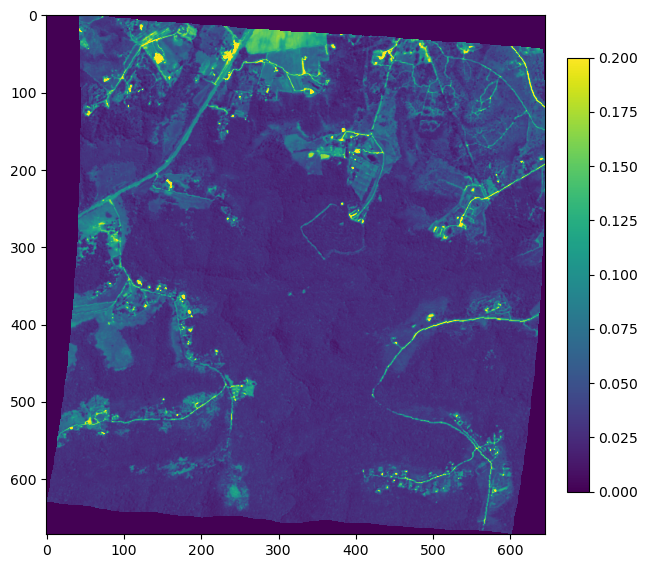

In [29]:
#### uncomment one of the GetRaseterBand lines to run
img_red = rfl_007_open.GetRasterBand(57).ReadAsArray()  # Band 57 is 657nm (the center of the Landsat red band)
#img_green = rfl_007_open.GetRasterBand(38).ReadAsArray()  # Band 38 is 562nm (the center of the Landsat green band)
#img_blue = rfl_007_open.GetRasterBand(22).ReadAsArray()  # Band 22 is 482nm (the center of the Landsat blue band)
plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(img_red, vmin=0, vmax=.20)
#plt.imshow(img_green, vmin=0, vmax=0.20)
#plt.imshow(img_blue, vmin=0, vmax=0.20)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

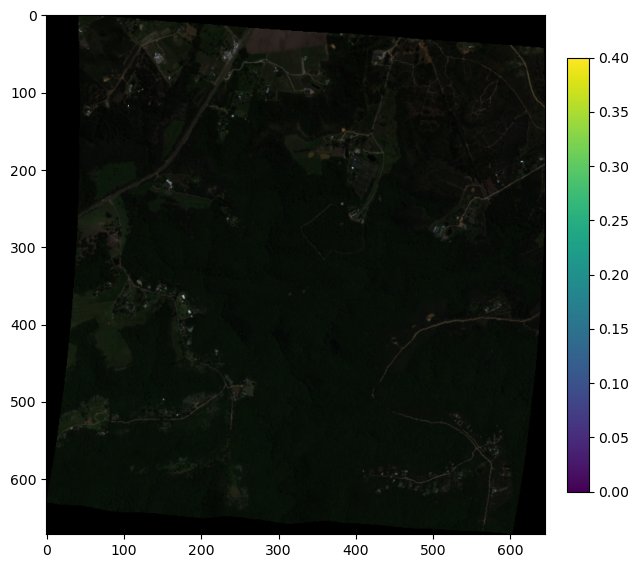

In [33]:
# Create a Red, Green, Blue Composite and Visualize
# get r,g,b arrays
red, green, blue = rfl_007_open.GetRasterBand(57).ReadAsArray(), rfl_007_open.GetRasterBand(38).ReadAsArray(), rfl_007_open.GetRasterBand(22).ReadAsArray()

# set fill values (-9999.) to 0 for each array
red[red == -9999.], green[green == -9999.], blue[blue == -9999.] = 0, 0, 0

# function scales reflectance values to 8 bits
scale8bit = lambda a: ((a - a.min()) * (1/(a.max() - a.min()) * 255)).astype('uint8')

# get 8bit arrays for each band
red8, green8, blue8 = scale8bit(red), scale8bit(green), scale8bit(blue)

# set rescaled fill pixels back to 0 for each array
red8[red == 0], green8[green == 0], blue8[blue == 0] = 0, 0, 0

rgb_stack = np.zeros((nrows,ncols,3),'uint8')
rgb_stack[...,0], rgb_stack[...,1], rgb_stack[...,2] = red8, green8, blue8

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [35]:
# Apply a Histogram Stretch to for an Improved Visualization
rgb_stack.shape

(672, 646, 3)

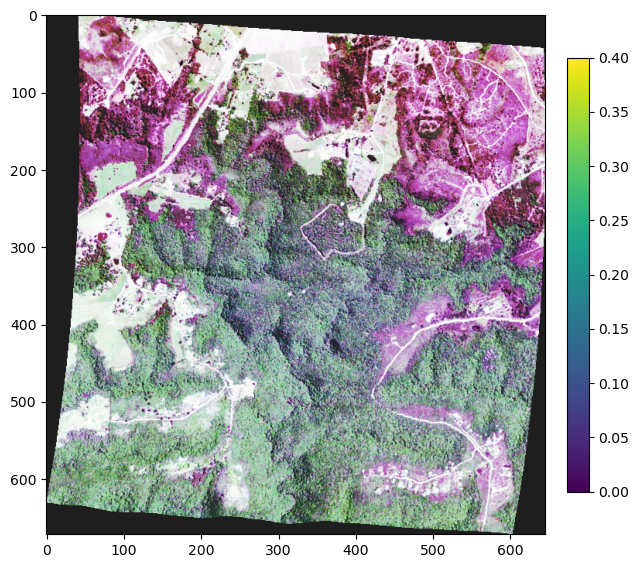

In [37]:
# apply histogram equalization to each band
for i in range(rgb_stack.shape[2]):

    # band i
    b = rgb_stack[:,:,i]
    
    # histogram from flattened (1d) image
    b_histogram, bins = np.histogram(b.flatten(), 256)

    # cumulative distribution function
    b_cumdistfunc = b_histogram.cumsum()

    # normalize
    b_cumdistfunc = 255 * b_cumdistfunc / b_cumdistfunc[-1]

    # get new values by linear interpolation of cdf
    b_equalized = np.interp(b.flatten(), bins[:-1], b_cumdistfunc)
    
    # reshape to 2d and add back to rgb_stack
    rgb_stack[:,:,i] = b_equalized.reshape(b.shape)

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [39]:
# Plot a Spectral Profile From a Point of Interest
import matplotlib.pyplot as plt
from spectral.io import envi
import numpy as np
from pyproj import Proj
import os
from osgeo import gdal

In [41]:
# let's define the coordinates and data file from which we'll extract spectra and the lat/lon coordinates
data_file = 'data/ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT'
coords = [-33.978573, 23.474745]
coords

[-33.978573, 23.474745]

In [43]:
data_file

'data/ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT'

In [ ]:
# 1. Project point location lat/lon to UTM (zone 34S): Recall, the AVIRIS-NG Scene is in UTM zone 34S (EPSG:32734)

In [45]:
# step to translate coordinates
# EPSG:32734 - WGS-84 / UTM zone 34S

from pyproj import Proj
p = Proj("EPSG:32734", preserve_units=False)
x,y = p(23.474745, -33.978573)
print('x value in UTM meters:', x)
print('y value in UTM meters:', y)

x value in UTM meters: 728621.594343807
y value in UTM meters: 6237459.364997024


In [47]:
coords_UTM = [6237459.364997024, 728621.594343807]

# define aonther location for comparison
coords_UTM2 = [6239776.9, 730509.6]

In [49]:
gdal_ds = gdal.Open(data_file)
proj_native = gdal_ds.GetProjection()
proj_native

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [ ]:
# 2. And now let's get and print AVIRIS-NG Scene information that we need in order to transform the UTM point x,y values to an image row/col location

In [51]:
trans = gdal_ds.GetGeoTransform() # x_ul, x_px, x_rot, y_ul, y_rot, y_px
print('\nGetGeoTransform Return Values =', trans) 


GetGeoTransform Return Values = (727446.8657409984, 5.0, 0.0, 6240280.191764411, 0.0, -5.0)


In [ ]:
# 3. x,y offset values are a position on the x,y grid of the pixel of interest

In [53]:
x_px_offset = int(round((coords_UTM[1] - trans[0]) / trans[1]))
y_px_offset = int(round((coords_UTM[0] - trans[3]) / trans[5]))

print(x_px_offset, y_px_offset)

235 564


In [55]:
x_px_offset2 = int(round((coords_UTM2[1] - trans[0]) / trans[1]))
y_px_offset2 = int(round((coords_UTM2[0] - trans[3]) / trans[5]))

print(x_px_offset2, y_px_offset2)

613 101


In [57]:
ds = envi.open(os.path.splitext(data_file)[0] + '.hdr')
ds

	Data Source:   '.\data/ang20231110t081307_007_L2A_OE_main_27577724_RFL_ORT'
	# Rows:            672
	# Samples:         646
	# Bands:           425
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32

In [61]:
offset_size = 1
data = ds.open_memmap(interleave='bip')[y_px_offset - 1: y_px_offset + 1, x_px_offset - 1: x_px_offset + 1, :]
data

memmap([[[-0.01      ,  0.00289236,  0.00457073, ...,  0.03445599,
           0.0347283 , -0.01      ],
         [-0.01      ,  0.00175371,  0.00621394, ...,  0.05008628,
           0.05223015, -0.01      ]],

        [[-0.01      , -0.00154808,  0.00136837, ...,  0.03586054,
           0.0372976 , -0.01      ],
         [-0.01      , -0.00040135,  0.00306094, ...,  0.04770288,
           0.04940803, -0.01      ]]], dtype=float32)

In [63]:
offset_size = 1
data2 = ds.open_memmap(interleave='bip')[y_px_offset2 - 1: y_px_offset2 + 1, x_px_offset2 - 1: x_px_offset2 + 1, :]
data2

memmap([[[-0.01      , -0.0062717 , -0.00514177, ...,  0.08932899,
           0.08922052, -0.01      ],
         [-0.01      , -0.00691198, -0.00562219, ...,  0.09379171,
           0.09304493, -0.01      ]],

        [[-0.01      , -0.0143595 , -0.00598846, ...,  0.0998622 ,
           0.10107639, -0.01      ],
         [-0.01      , -0.01307312, -0.00500294, ...,  0.09043696,
           0.09094234, -0.01      ]]], dtype=float32)

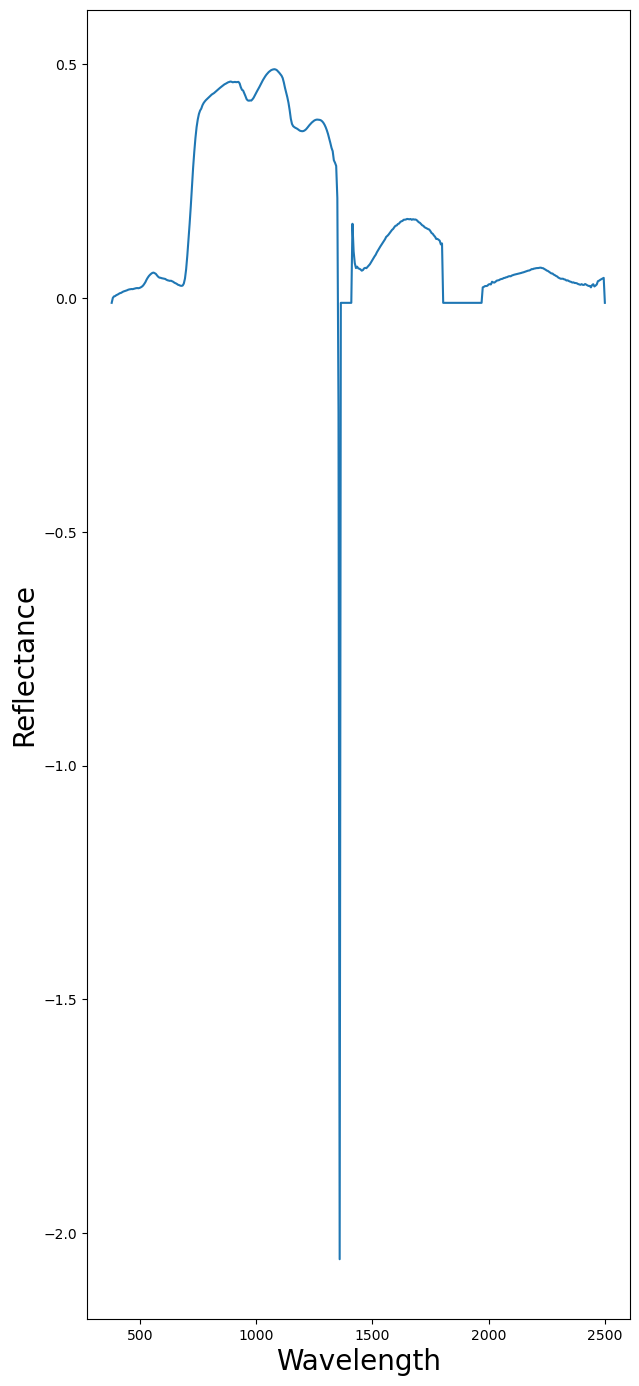

In [65]:
wl = np.array([float(x) for x in ds.metadata['wavelength']])
wl2 = np.array([float(x) for x in ds.metadata['wavelength']])

plt.plot(wl, np.mean(data, axis=(0, 1)))
plt.rcParams['figure.figsize'] = [8, 8]
plt.xlabel('Wavelength', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

# plot the average spectrum

In [67]:
# Define a list of wavelengths that are "bad" 

bblist = np.ones((425,))  # create a 1D array with values ones
# set tails and atmospheric window to zero
bblist[0:14] = 0        # tail
bblist[189:225] = 0     # atmospheric window
bblist[281:336] = 0     # atmospheric window
bblist[405:] = 0        # tail

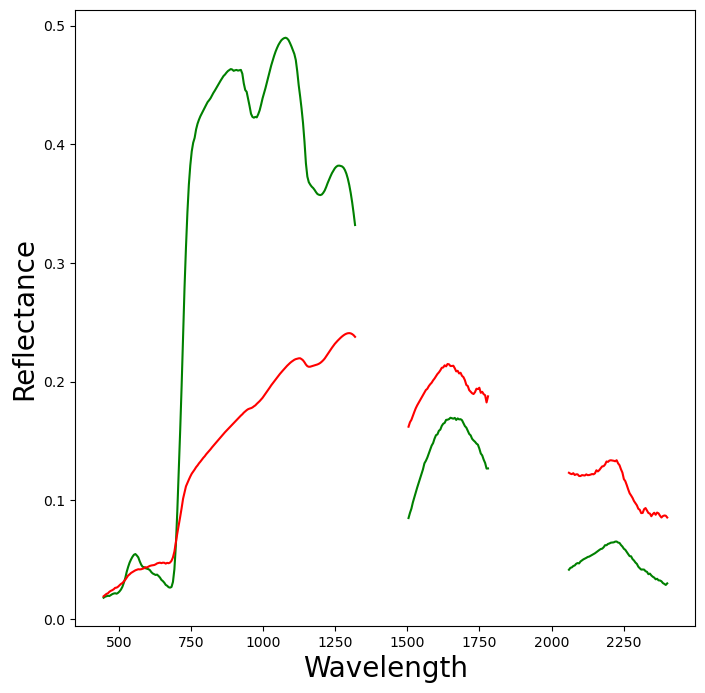

In [69]:
plt.rcParams['figure.figsize'] = [8, 8]

wl[bblist == 0] = np.nan 
wl2[bblist == 0] = np.nan
plt.plot(wl, np.mean(data, axis=(0, 1)), color = 'g')
plt.plot(wl2, np.mean(data2, axis=(0, 1)), color = 'r')
plt.xlabel('Wavelength', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()